# Day6 's practice Assignments:
 
    1.	Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).
    2.	Build a Multiclass image classification model with InceptionV3 and Mobilenet pretrained network.
    Note: Download any dataset 

# 1.Build a Transfer Learning image classification model using the VGG16 & VGG19 (pre-trained network).

In [2]:
# Import necessary libraries
from keras.applications import VGG16
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Define data paths
train_path = 'C:/Users/Abhisek Das/Desktop/learing mphasis/PHASE 2/1. AI SOLUTION DEVELOPER/PE- Answers/Deep Learning/PE-16/train'
test_path = 'C:/Users/Abhisek Das/Desktop/learing mphasis/PHASE 2/1. AI SOLUTION DEVELOPER/PE- Answers/Deep Learning/PE-16/test'

In [4]:
# Use ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data
train_set = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 768 images belonging to 2 classes.
Found 336 images belonging to 2 classes.


In [8]:
# Load pre-trained VGG16 model without top layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model by adding custom top layers to the pre-trained VGG16
vgg16_model = Sequential()
vgg16_model.add(base_model_vgg16)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(512, activation='relu'))
vgg16_model.add(Dense(2, activation='softmax'))  # Assuming 2 classes, update if you have a different number

# Compile the model
vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg16_history=vgg16_model.fit(train_set, validation_data=test_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/5
24/24 [==============================] - 988s 41s/step - loss: 0.7396 - accuracy: 0.5182 - val_loss: 0.6997 - val_accuracy: 0.4970
Epoch 2/5
24/24 [==============================] - 934s 39s/step - loss: 0.6554 - accuracy: 0.6172 - val_loss: 0.5786 - val_accuracy: 0.6875
Epoch 3/5
24/24 [==============================] - 924s 39s/step - loss: 0.5687 - accuracy: 0.7005 - val_loss: 0.5763 - val_accuracy: 0.6756
Epoch 4/5
24/24 [==============================] - 858s 36s/step - loss: 0.4721 - accuracy: 0.7721 - val_loss: 0.4233 - val_accuracy: 0.8095
Epoch 5/5
24/24 [==============================] - 801s 33s/step - loss: 0.3587 - accuracy: 0.8438 - val_loss: 0.3707 - val_accuracy: 0.8512


In [9]:
# Load pre-trained VGG19 model without top layers
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model by adding custom top layers to the pre-trained VGG19
vgg19_model = Sequential()
vgg19_model.add(base_model_vgg19)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(512, activation='relu'))
vgg19_model.add(Dense(2, activation='softmax'))  # Assuming 2 classes, update if you have a different number

# Compile the model
vgg19_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg19_history=vgg19_model.fit(train_set, validation_data=test_set, epochs=5, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/5
24/24 [==============================] - 1130s 47s/step - loss: 0.7140 - accuracy: 0.5833 - val_loss: 0.5666 - val_accuracy: 0.7649
Epoch 2/5
24/24 [==============================] - 1160s 48s/step - loss: 0.5119 - accuracy: 0.7526 - val_loss: 0.4580 - val_accuracy: 0.7827
Epoch 3/5
24/24 [==============================] - 1105s 46s/step - loss: 0.4090 - accuracy: 0.8242 - val_loss: 0.3125 - val_accuracy: 0.8631
Epoch 4/5
24/24 [==============================] - 957s 40s/step - loss: 0.2911 - accuracy: 0.8919 - val_loss: 0.2914 - val_accuracy: 0.9018
Epoch 5/5
24/24 [==============================] - 958s 40s/step - loss: 0.2052 - accuracy: 0.9219 - val_loss: 0.2517 - val_accuracy: 0.9048


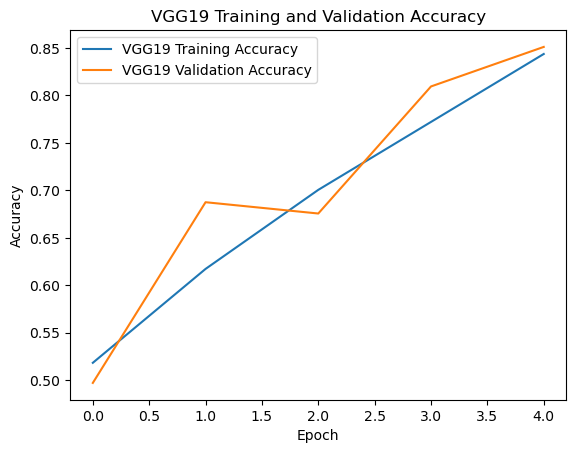

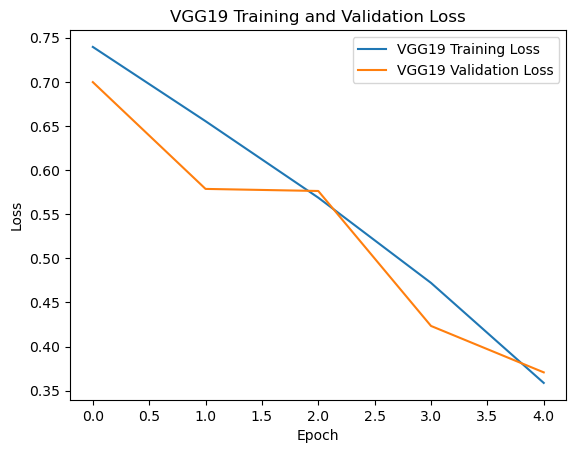

In [10]:
# Plot training history for VGG16
import matplotlib.pyplot as plt

plt.plot(vgg16_history.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG19 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss history for VGG16
plt.plot(vgg16_history.history['loss'], label='VGG19 Training Loss')
plt.plot(vgg16_history.history['val_loss'], label='VGG19 Validation Loss')
plt.title('VGG19 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()